In [12]:
# Load libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

# Import libraries

import numpy as np
import pandas as pd
from numpy import bincount, linspace, mean, std, arange, squeeze
import itertools, time, datetime
from scipy.stats import randint
from pandas import set_option
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# import graphviz 
# from graphviz import Source
from IPython.display import SVG

from sklearn import tree
#from sklearn.tree.export import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, precision_score, recall_score


In [8]:
!pip3 install plotly

In [2]:
# Load data

cancer = load_breast_cancer()

In [3]:
print(list(cancer.target_names))
print(list(cancer.feature_names))


['malignant', 'benign']
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [9]:
# Inspect data
# (1) info
# (2) descriptive statistics
# (3) first five rows

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)



In [10]:
# Examine predictors

cancer.feature_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [19]:
# Test-train split
# Hint:  explanatory data is 'cancer.data' and outcome is 'cancer.target'

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)

In [16]:
# Create decision tree classifier
cls = DecisionTreeClassifier()


In [20]:
# Train the estimator
cls.fit(X_train, Y_train)


DecisionTreeClassifier()

In [23]:
# Evaluate the accuracy of the assignment
Y_pred = cls.predict(X_test)
print("Accuracy:", accuracy_score(Y_pred, Y_test))


Accuracy: 0.8859649122807017


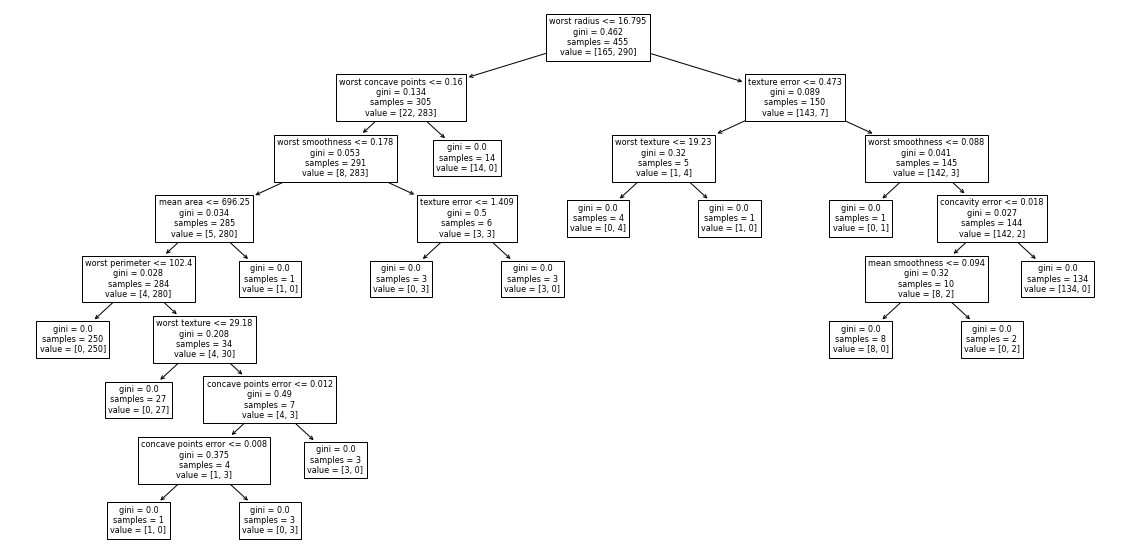

In [25]:
# Generate tree

fig, axe = plt.subplots(figsize=(20,10))
tree.plot_tree(cls, feature_names=cancer.feature_names);

In [27]:
# Make predictions.
Y_pred = cls.predict(X_test)

# CV score
print("Cross Validation:", cross_val_score(cls, X_test, Y_test))


Cross Validation: [0.86956522 0.86956522 0.91304348 0.86956522 0.81818182]


In [28]:
# Accuracy: 1 is perfect prediction.
print('Accuracy: %.3f' % cls.score(X_test, Y_test))

# Precision
print('Precision: %.3f' % precision_score(Y_test, Y_pred))

# Recall
print('Recall: %.3f' % recall_score(Y_test, Y_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(Y_test, Y_pred))

Accuracy: 0.886
Precision: 0.897
Recall: 0.910
F1 score: 0.904


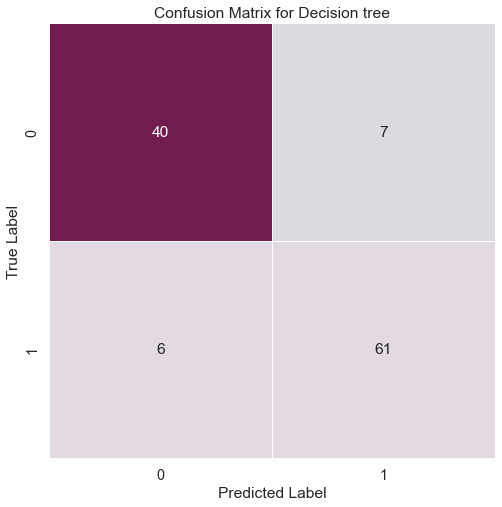

In [29]:
# Plot confusion matrix for Decision tree.
tr_matrix = confusion_matrix(Y_test,Y_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(tr_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision tree');

In [31]:
# Predict probabilities for the test data.
cls_probs = cls.predict_proba(X_test)

# Keep Probabilities of the positive class only.
cls_probs = cls_probs[:, 1]

# Compute the AUC Score.
auc_tr = roc_auc_score(Y_test, cls_probs)
print('AUC: %.2f' % auc_tr)

AUC: 0.88


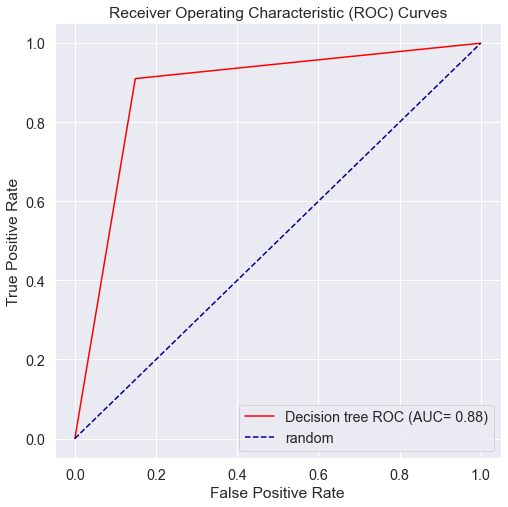

In [32]:
# Get the ROC Curves.
tr_fpr, tr_tpr, tr_thresholds = roc_curve(Y_test, cls_probs)

# Plot the ROC curves.
plt.figure(figsize=(8,8))
plt.plot(tr_fpr, tr_tpr, color='red', label='Decision tree ROC (AUC= %0.2f)'% auc_tr)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()